![EDA Logo](edamaria.png)

In [1]:
%pip install seaborn
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [2]:


merged = pd.read_csv('data/merged.csv', sep=';')
movies = pd.read_csv('data/movies_meta_data.csv', sep=';', engine='python')
users = pd.read_csv('data/users.dat', sep='::', engine='python', names=['userId', 'gender', 'age', 'occupation', 'zip-code'])
ratings = pd.read_csv('data/ratings.dat', sep='::', engine='python', names=['userId', 'movieId', 'rating', 'timestamp'])


C:\Users\jansc\AppData\Local\Temp\ipykernel_18532\1604429199.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  merged = pd.read_csv('data/merged.csv', sep=';')


             userId   movieId    rating  timestamp
userId     1.000000 -0.017739  0.012303  -0.490383
movieId   -0.017739  1.000000 -0.064042   0.041632
rating     0.012303 -0.064042  1.000000  -0.026770
timestamp -0.490383  0.041632 -0.026770   1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

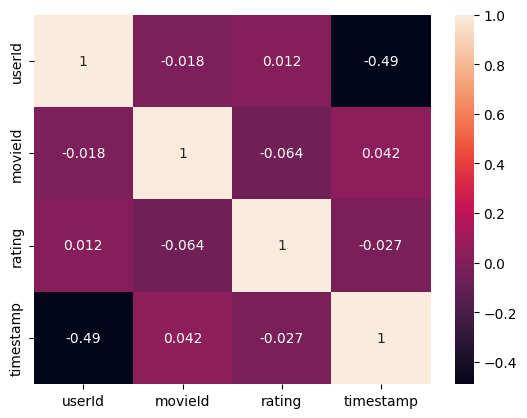

In [10]:
corr_matrix = ratings.corr()
print(corr_matrix)
sn.heatmap(corr_matrix, annot=True)
plt.show

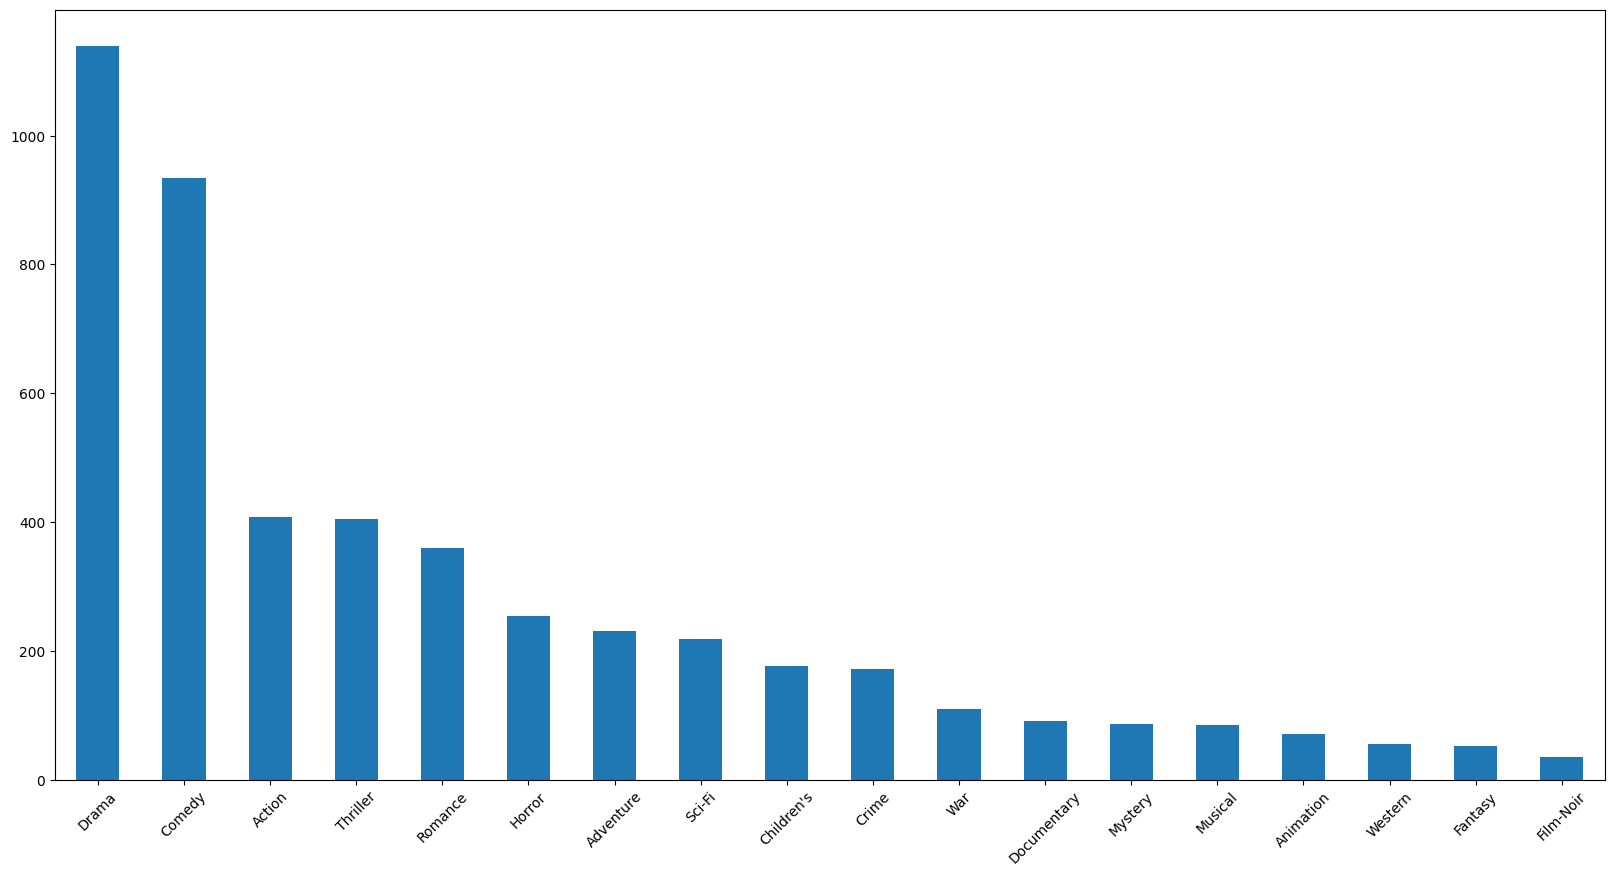

In [19]:
# Create a barchart for the number of movies for every genre
movies['genres'].str.get_dummies(sep='|').sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,10))
plt.xticks(rotation=45)
plt.show()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140]),
 [Text(0, 0, '1919'),
  Text(1, 0, '1922'),
  Text(2, 0, '1923'),
  Text(3, 0, '1925'),
  Text(4, 0, '1926'),
  Text(5, 0, '1927'),
  Text(6, 0, '1928'),
  Text(7, 0, '1929'),
  Text(8, 0, '1930'),
  Text(

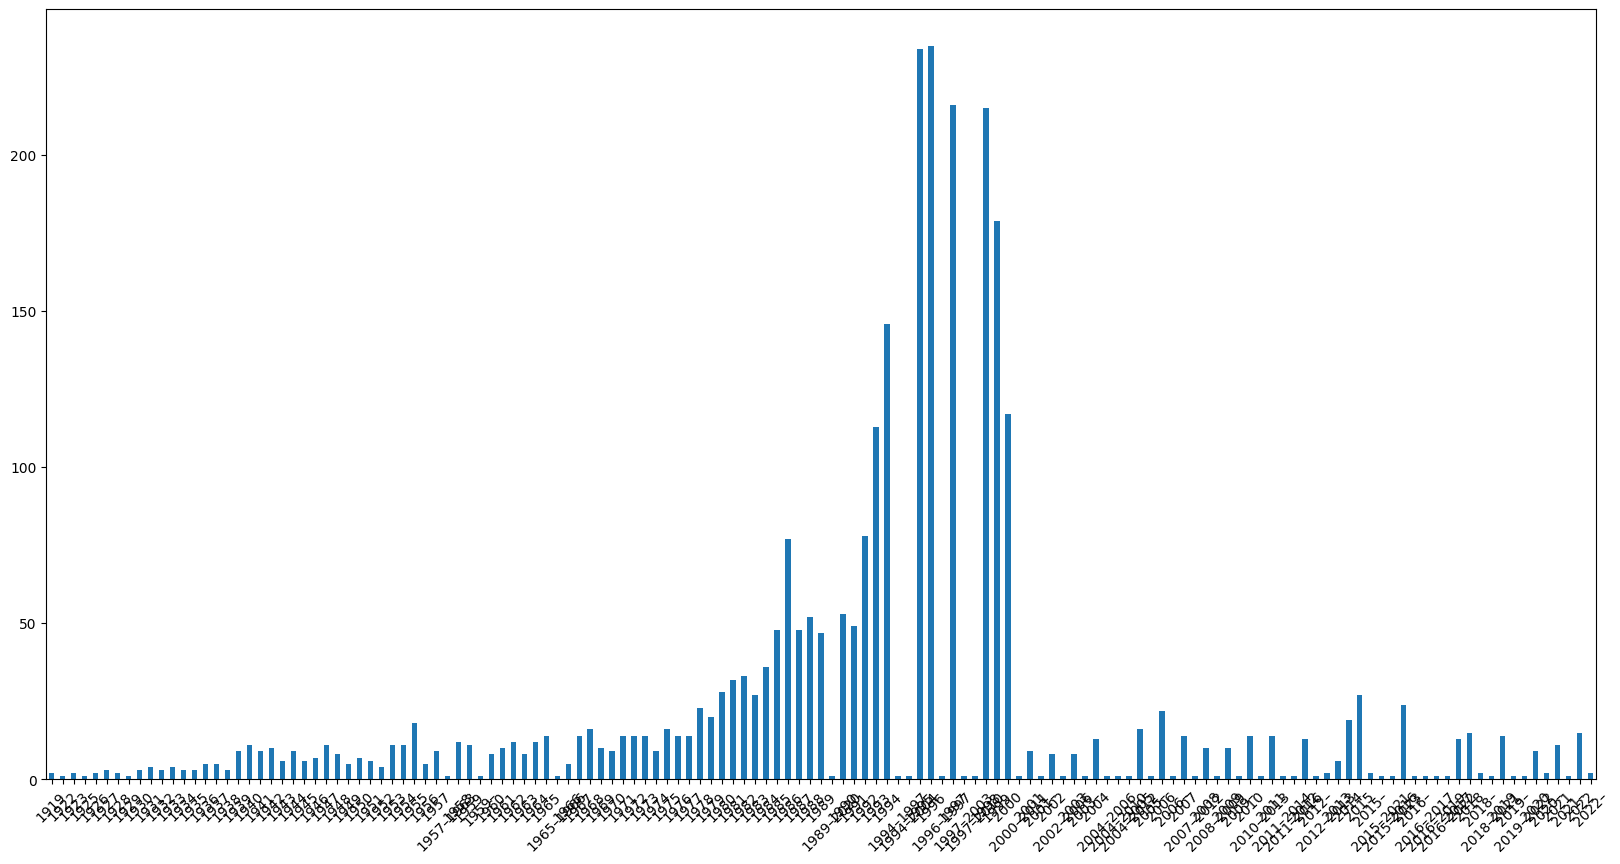

In [18]:
# Create a barchart for the number of movies for every year
movies['Year'].value_counts().sort_index().plot(kind='bar', figsize=(20,10))
plt.xticks(rotation=45)
plt.show()

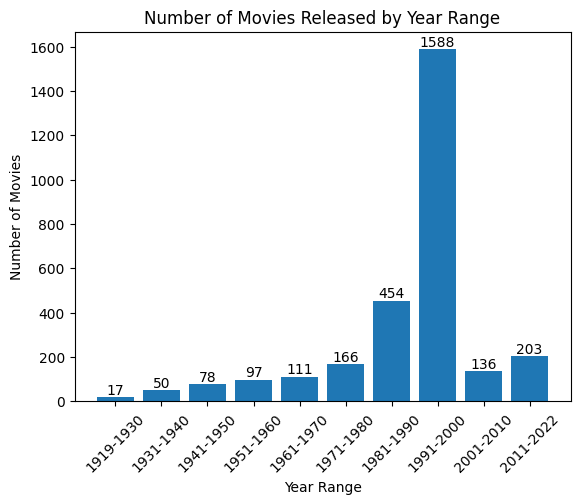

In [15]:

# define a custom function to map each year to its corresponding year range
def year_to_range(year):
    if isinstance(year, str):
        # extract the first four characters from the year string
        year = int(year[:4])
    if year >= 1919 and year <= 1930:
        return '1919-1930'
    elif year >= 1931 and year <= 1940:
        return '1931-1940'
    elif year >= 1941 and year <= 1950:
        return '1941-1950'
    elif year >= 1951 and year <= 1960:
        return '1951-1960'
    elif year >= 1961 and year <= 1970:
        return '1961-1970'
    elif year >= 1971 and year <= 1980:
        return '1971-1980'
    elif year >= 1981 and year <= 1990:
        return '1981-1990'
    elif year >= 1991 and year <= 2000:
        return '1991-2000'
    elif year >= 2001 and year <= 2010:
        return '2001-2010'
    elif year >= 2011 and year <= 2022:
        return '2011-2022'

# create a new column in the dataframe to group the years into year ranges
movies['Year Range'] = movies['Year'].apply(year_to_range)

# use pandas value_counts function to count the number of movies in each year range
movies_per_year_range = movies['Year Range'].value_counts().sort_index()

# create a bar chart using matplotlib
plt.bar(movies_per_year_range.index, movies_per_year_range.values)

# add labels to the bars
for i, value in enumerate(movies_per_year_range.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# set the chart title and axis labels
plt.title('Number of Movies Released by Year Range')
plt.xlabel('Year Range')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)

# display the chart
plt.show()

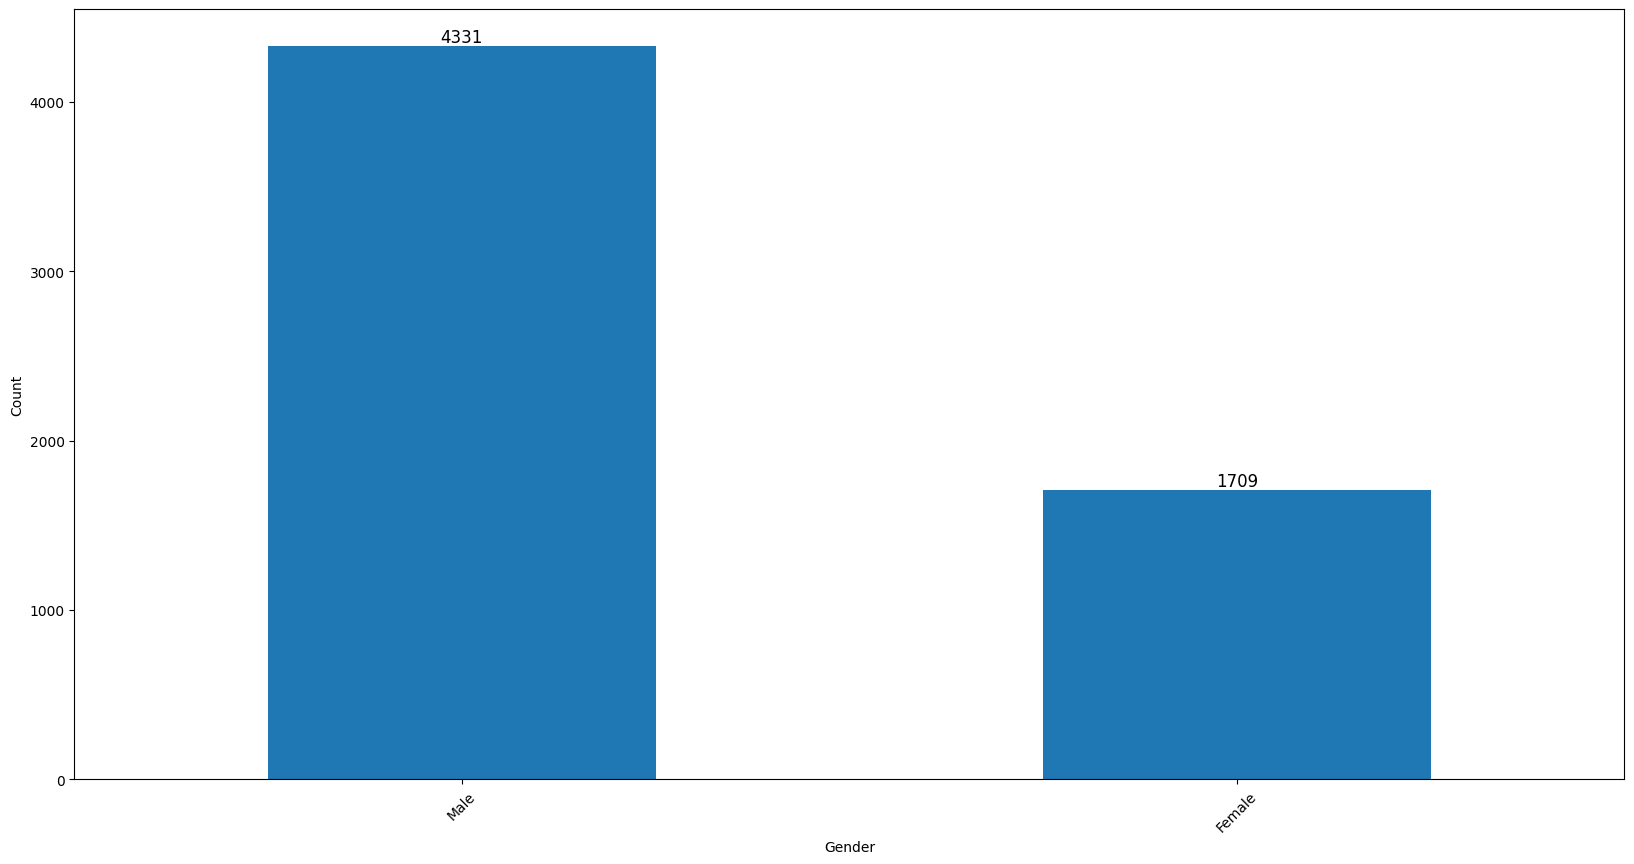

In [16]:
# Map gender codes to labels
gender_labels = {'M': 'Male', 'F': 'Female'}

# Create a barchart for the genders in the users dataframe
ax = users['gender'].map(gender_labels).value_counts().plot(kind='bar', figsize=(20,10))

# Set the x- and y-axis labels
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

# Add annotations for the count above each bar
for i, v in enumerate(users['gender'].map(gender_labels).value_counts()):
    ax.annotate(str(v), xy=(i, v + 20), ha='center', fontsize=12)

plt.xticks(rotation=45)
plt.show()

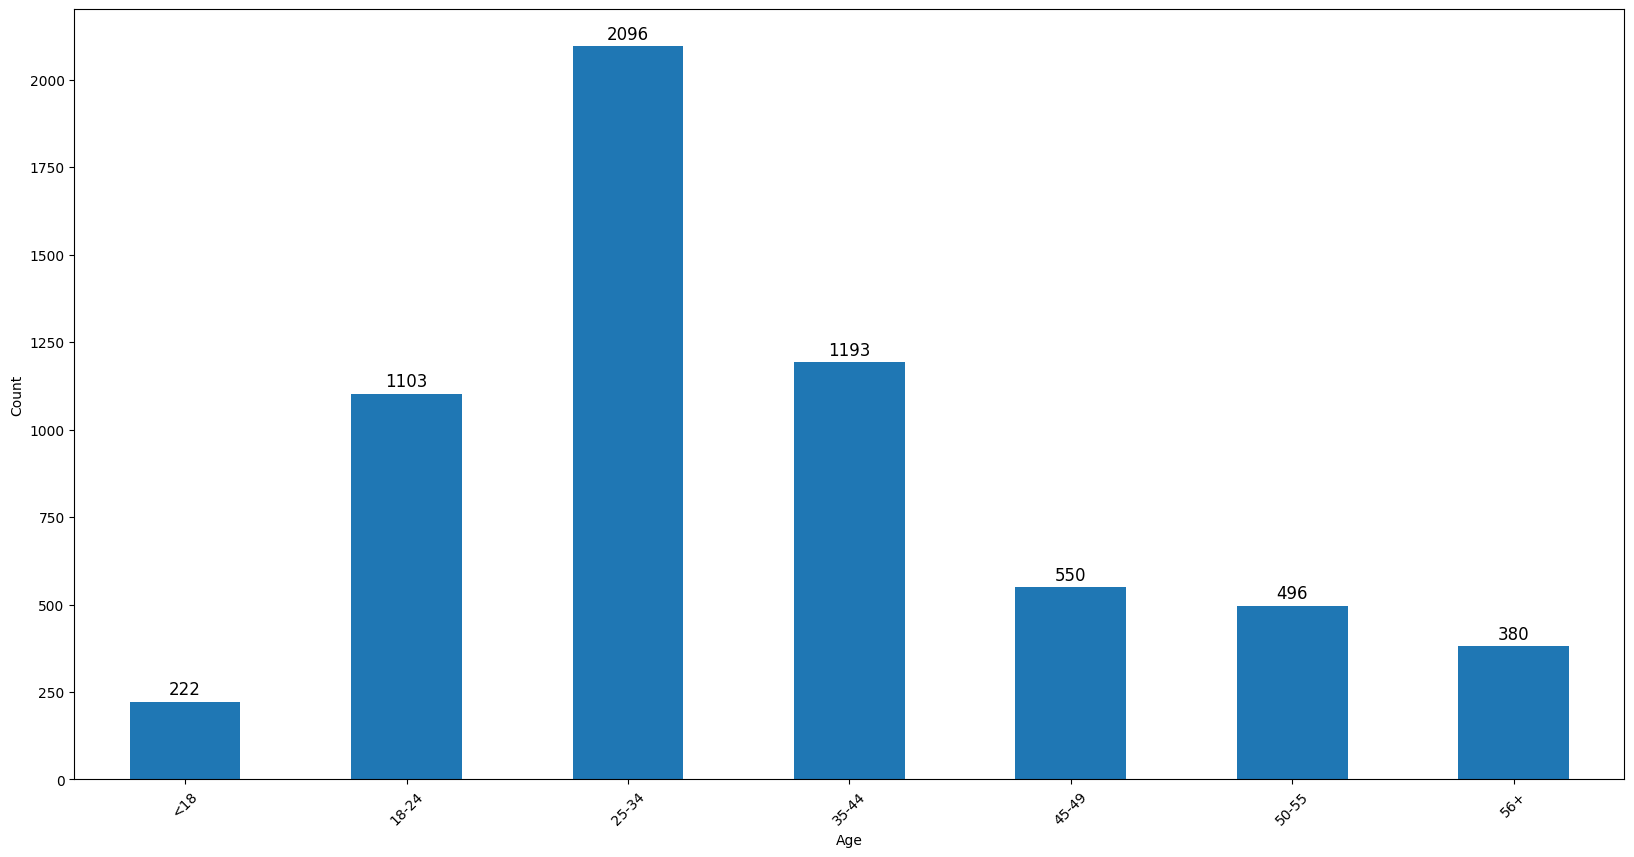

In [17]:
# Define the age categories
age_categories = ['<18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']

# Create a barchart for the ages in the users dataframe
ax = users['age'].value_counts().sort_index().plot(kind='bar', figsize=(20,10))

# Set the x-axis labels to the age categories
ax.set_xticklabels(age_categories)

# Set the x- and y-axis labels
ax.set_xlabel('Age')
ax.set_ylabel('Count')

# Add annotations for the count above each bar
for i, v in enumerate(users['age'].value_counts().sort_index()):
    ax.annotate(str(v), xy=(i, v + 20), ha='center', fontsize=12)
    
plt.xticks(rotation=45)
plt.show()

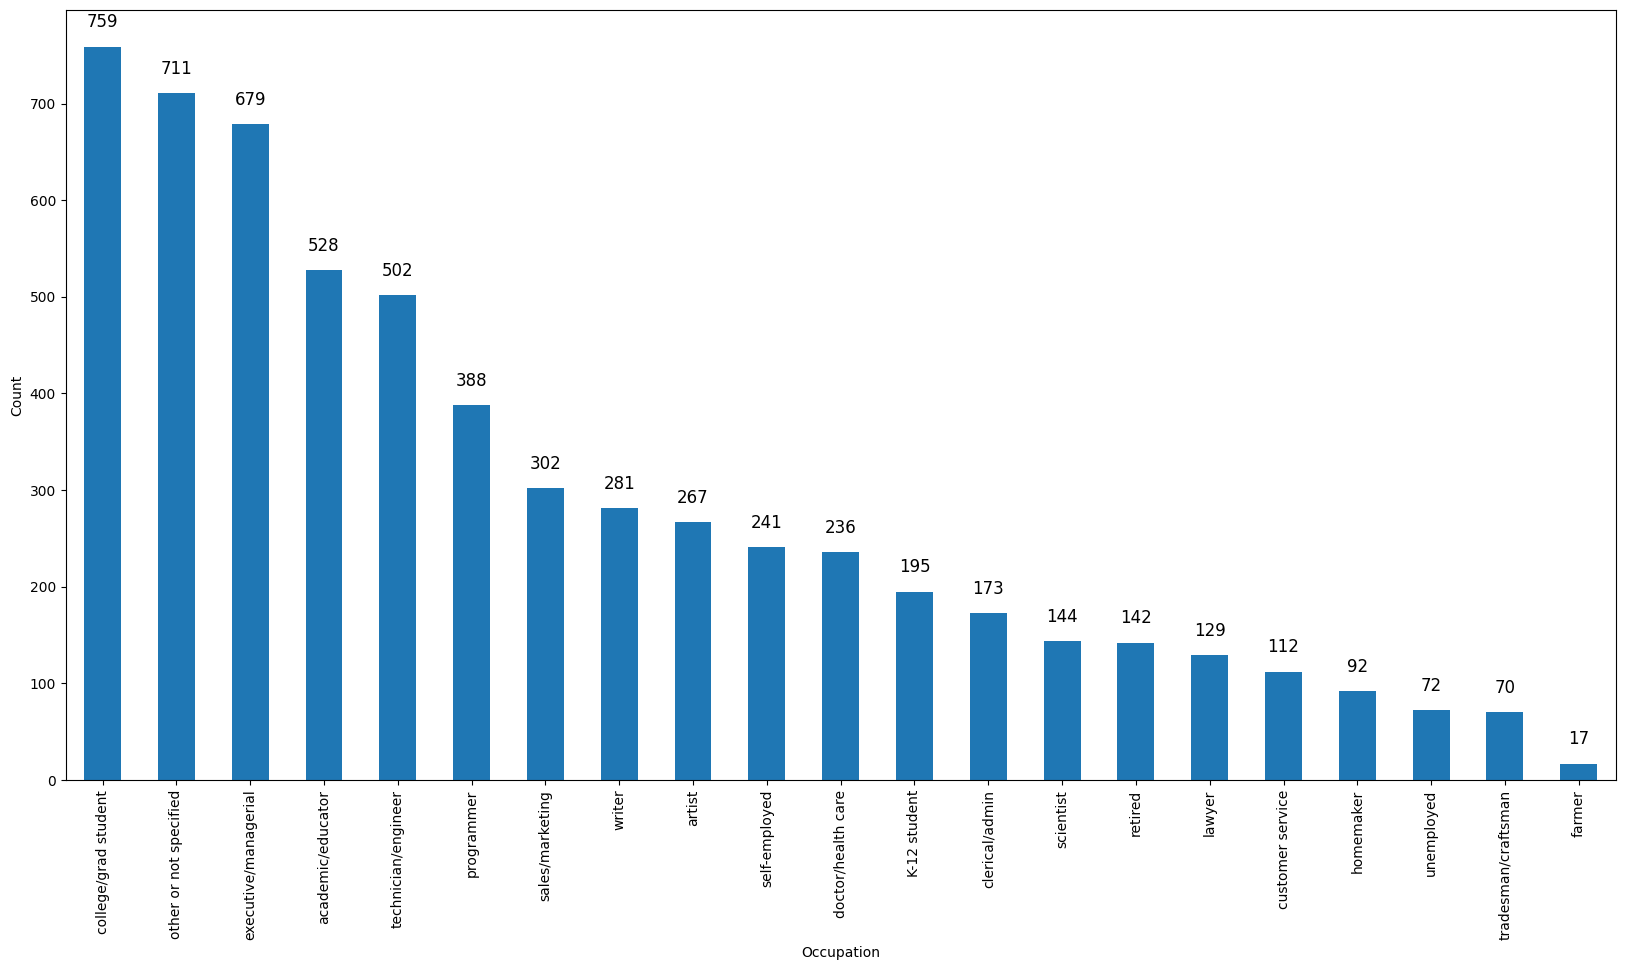

In [4]:
# Define a dictionary to map numeric occupation values to text labels
occupation_labels = {0: "other or not specified",
                     1: "academic/educator",
                     2: "artist",
                     3: "clerical/admin",
                     4: "college/grad student",
                     5: "customer service",
                     6: "doctor/health care",
                     7: "executive/managerial",
                     8: "farmer",
                     9: "homemaker",
                     10: "K-12 student",
                     11: "lawyer",
                     12: "programmer",
                     13: "retired",
                     14: "sales/marketing",
                     15: "scientist",
                     16: "self-employed",
                     17: "technician/engineer",
                     18: "tradesman/craftsman",
                     19: "unemployed",
                     20: "writer"}

# Replace the numeric occupation values with text labels using the map method
users['occupation'] = users['occupation'].map(occupation_labels)

# Plot a bar chart of the occupations in the users dataframe
fig, ax = plt.subplots(figsize=(20, 10))
users['occupation'].value_counts().plot(kind='bar', ax=ax)

# Add annotations for the count above each bar
for i, v in enumerate(users['occupation'].value_counts()):
    ax.annotate(str(v), xy=(i, v + 20), ha='center', fontsize=12)

# Set the x- and y-axis labels
ax.set_xlabel('Occupation')
ax.set_ylabel('Count')

plt.xticks(rotation=45)
plt.show()

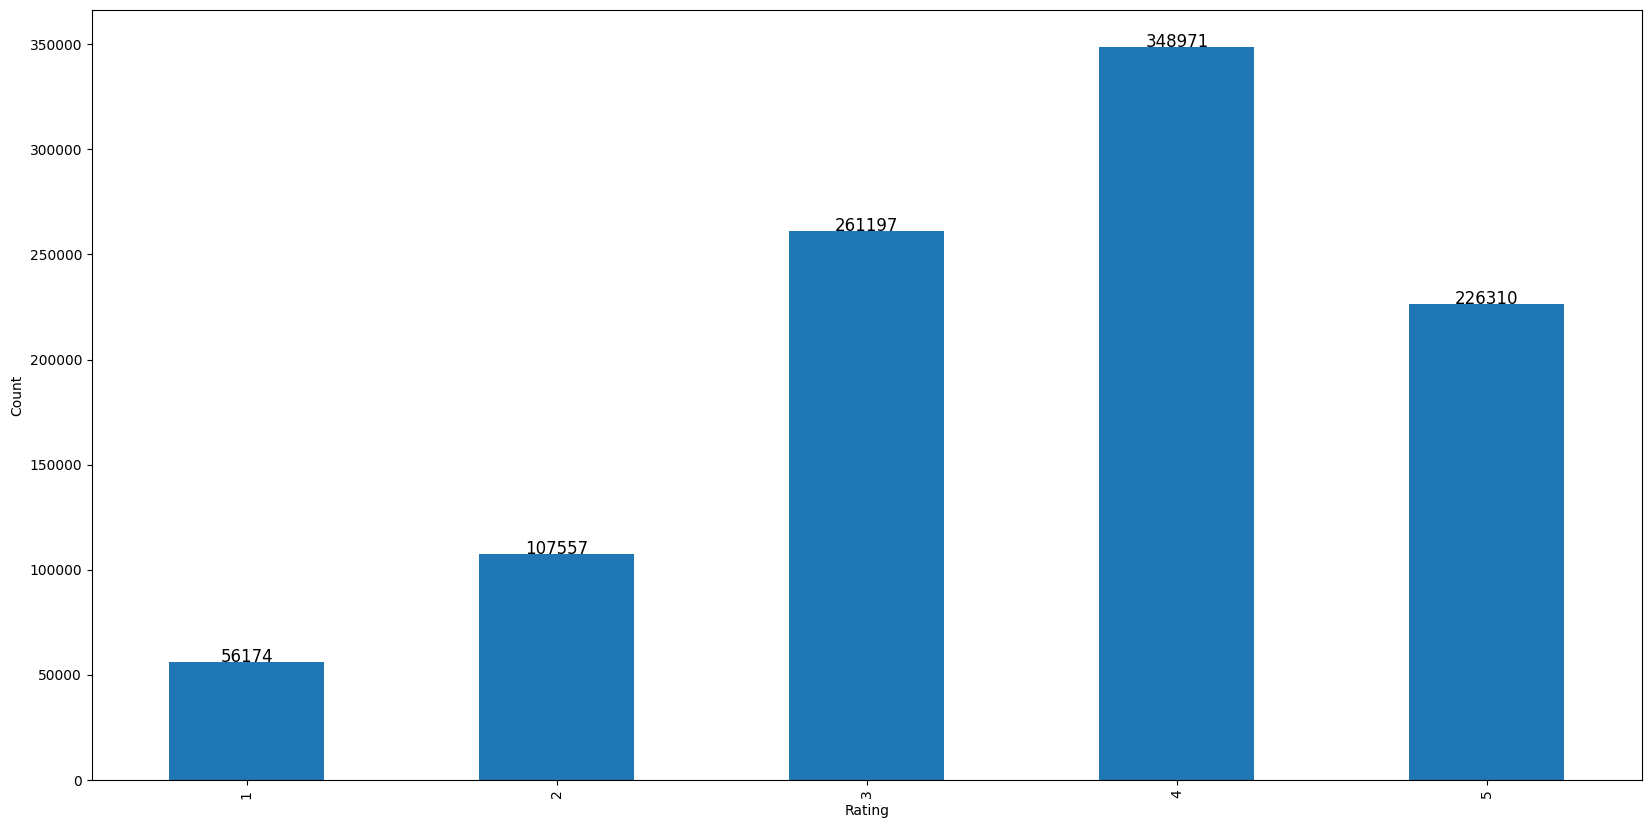

In [13]:
#create a barchart for the ratings in the ratings dataframe
ax = ratings['rating'].value_counts().sort_index().plot(kind='bar', figsize=(20,10))

# Set the x- and y-axis labels
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

# Add annotations for the count above each bar
for i, v in enumerate(ratings['rating'].value_counts().sort_index()):
    ax.annotate(str(v), xy=(i, v + 20), ha='center', fontsize=12)

plt.xticks(rotation=45)
plt.show()
